In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

with open('../aditional_files/variables_values.json') as user_file:
  parsed_json = json.load(user_file)

In [2]:
def read_data_in_chunks(path, chunksize = 50000, cols_to_use = None, dtypes_dict = None):
    if dtypes_dict is None:
        dtypes_dict = {}
    if cols_to_use is None:
        cols_to_use = []
    #READ DATASET IN CHUNKS
    data = pd.read_csv(path,chunksize=chunksize, usecols=cols_to_use, dtype=dtypes_dict)   
    #SPREAD CHUNKS IN ARRAY
    data = [chunk for chunk in data]
    #CONCATENATE CHUNKS IN A SINGLE DATAFRAME
    return pd.concat(data)


In [3]:
viviendas = read_data_in_chunks(parsed_json['viviendas_path'], cols_to_use=parsed_json['viviendas_var_to_use'], dtypes_dict=parsed_json['georref_data_parsing'])
georref = read_data_in_chunks(parsed_json['geo_path'], cols_to_use=parsed_json['geo_var_to_use'], dtypes_dict=parsed_json['georref_data_parsing'])
personas = read_data_in_chunks(parsed_json['personas_path'], cols_to_use=parsed_json['personas_var_to_use'], dtypes_dict=parsed_json['georref_data_parsing'])
hogares = read_data_in_chunks(parsed_json['hogares_path'], cols_to_use=parsed_json['hogares_var_to_use'], dtypes_dict=parsed_json['georref_data_parsing'])

In [37]:
georref['U_MPIO'].value_counts()

001    892921
088    176064
360     93669
266     81511
615     47481
        ...  
150      1729
501      1551
475      1257
658      1255
004      1057
Name: U_MPIO, Length: 125, dtype: int64

In [38]:
georref = georref.loc[georref['U_MPIO'].isin(['001','088','212','266','360','380','631'])]

In [4]:
print("Nulos en Georreferenciación: \n")
print(georref.isnull().mean())
print("\nNulos en Viviendas: \n")
print(viviendas.isnull().mean())
print("\nNulos en Hogares: \n")
print(hogares.isnull().mean())
print("\nNulos en Personas: ")
print(personas.isnull().mean())

Nulos en Georreferenciación: 

U_DPTO           0.0
U_MPIO           0.0
UA_CLASE         0.0
UA1_LOCALIDAD    0.0
U_SECT_URB       0.0
U_SECC_URB       0.0
COD_ENCUESTAS    0.0
dtype: float64

Nulos en Viviendas: 

COD_ENCUESTAS     0.000000
UVA_USO_UNIDAD    0.000000
V_TIPO_VIV        0.000772
V_CON_OCUP        0.000772
V_TOT_HOG         0.168022
VA1_ESTRATO       0.178003
VB_ACU            0.168022
VC_ALC            0.168022
VD_GAS            0.168022
VE_RECBAS         0.168022
VE1_QSEM          0.259593
VF_INTERNET       0.168022
V_TIPO_SERSA      0.168022
dtype: float64

Nulos en Hogares: 

COD_ENCUESTAS    0.000000
H_NRO_CUARTOS    0.000904
H_NRO_DORMIT     0.000904
H_AGUA_COCIN     0.008799
HA_NRO_FALL      0.985092
HA_TOT_PER       0.000904
dtype: float64

Nulos en Personas: 
COD_ENCUESTAS       0.000000
P_NROHOG            0.007246
P_SEXO              0.000000
P_EDADR             0.000000
P_PARENTESCOR       0.007246
PA_LUG_NAC          0.000000
PA_VIVIA_5ANOS      0.007246
PA

Analicemos cómo es la distribución de vacíos en los registros en los que el estrato es vacío

In [5]:
print("Tipo de vivienda: \n")
print(viviendas[viviendas['VA1_ESTRATO'].isnull()]['UVA_USO_UNIDAD'].value_counts())
print("\nNulos en otras columnas: \n")
print(viviendas[viviendas['VA1_ESTRATO'].isnull()].isnull().mean())

Tipo de vivienda: 

1    409597
2      2303
4      1794
Name: UVA_USO_UNIDAD, dtype: int64

Nulos en otras columnas: 

COD_ENCUESTAS     0.000000
UVA_USO_UNIDAD    0.000000
V_TIPO_VIV        0.004337
V_CON_OCUP        0.004337
V_TOT_HOG         0.943927
VA1_ESTRATO       1.000000
VB_ACU            0.943927
VC_ALC            0.943927
VD_GAS            0.943927
VE_RECBAS         0.943927
VE1_QSEM          0.981315
VF_INTERNET       0.943927
V_TIPO_SERSA      0.943927
dtype: float64


In [6]:
nulos_trabajo_personas = personas[personas['P_TRABAJO'].isnull()]


In [7]:
nulos_trabajo_personas.isnull().mean()

COD_ENCUESTAS       0.000000
P_NROHOG            0.056347
P_SEXO              0.000000
P_EDADR             0.000000
P_PARENTESCOR       0.056347
PA_LUG_NAC          0.000000
PA_VIVIA_5ANOS      0.056347
PA_VIVIA_1ANO       0.056347
P_ENFERMO           0.056347
CONDICION_FISICA    0.056347
P_ALFABETA          0.449429
PA_ASISTENCIA       0.504908
P_NIVEL_ANOSR       0.449429
P_TRABAJO           1.000000
P_EST_CIVIL         0.946428
PA_HNV              1.000000
PA1_THSV            1.000000
PA1_THFC            1.000000
dtype: float64

In [8]:
nulos_trabajo_personas['P_EDADR'].value_counts()

2     381885
1     345333
5       6505
4       5591
6       4616
7       4188
8       3545
9       2398
3       2365
10      1751
11      1580
12      1289
17      1276
18      1164
16      1158
13       984
15       929
14       820
19       734
20       222
21        49
Name: P_EDADR, dtype: int64

In [42]:
def analyze_categorical(df,plots,list_of_variables):
    fig, ax = plt.subplots(plots, 1, figsize = (5,10))
    for i,cat in enumerate(list_of_variables, start = 0):
        sns.countplot(data = df, x = cat, ax = ax[i])
        plt.tight_layout()

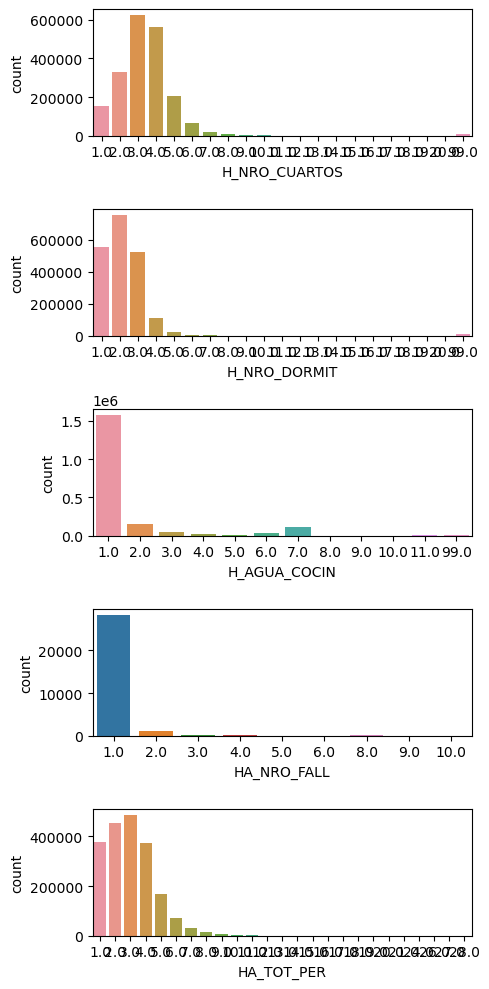

In [46]:
analyze_categorical(hogares, len([c for c in hogares.columns if c not in ['COD_ENCUESTAS']]), [c for c in hogares.columns if c not in ['U_DPTO','COD_ENCUESTAS','U_SECT_URB']])

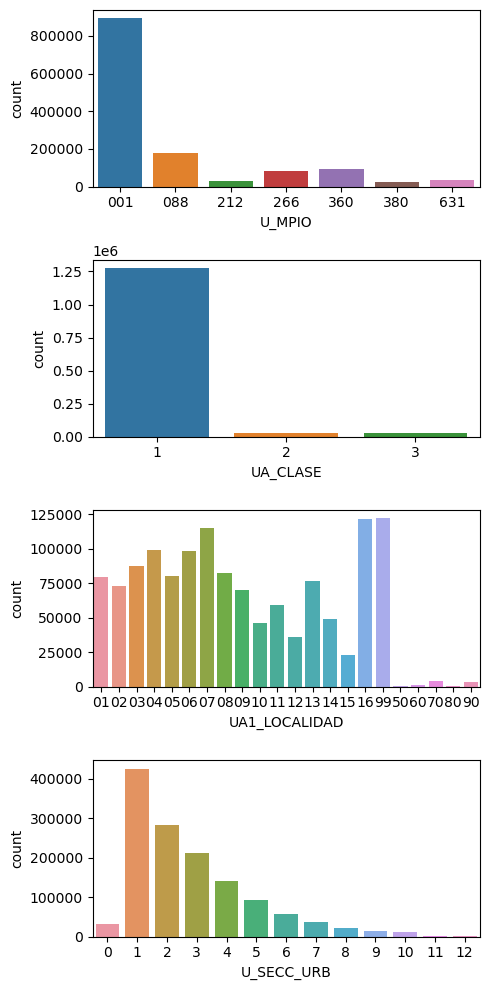

In [43]:
# fig, axs = plt.subplots(2, 2)
# for idx, col in enumerate([c for c in georref.columns if c not in ['U_DPTO','COD_ENCUESTAS','U_SECT_URB']]):
#     axs[idx, idx].bar(georref[col].value_counts())

analyze_categorical(georref, len([c for c in georref.columns if c not in ['U_DPTO','COD_ENCUESTAS','U_SECT_URB']]), [c for c in georref.columns if c not in ['U_DPTO','COD_ENCUESTAS','U_SECT_URB']])